# Introduction à la dualité

<div class="alert alert-info">
    
Je rappelle que l'objectif des Td-Tps est multiple
1. Vérifier qu'on a bien compris les notions mathématiques
1. S'assurer qu'on sait utiliser `Python` pour faire les calculs utiles
1. Apprendre à coordonner les réflexions mathématiques et les calculs informatiques.
</div>

## Exercice : utilisation de la dualité

On considère l'espace vectoriel $E=\mathscr{C}\left([a,b],\mathbb{R}\right)$ où $(a,b)\in\mathbb{R}^2$ et $a<b$. Soit $c\in]a,b[$, on définit les 4 formes linéaires de $E^\star$ suivantes
$$\varphi_1\;:\;f\longmapsto f(a),\quad \varphi_2\;:\;f\longmapsto f(b),\quad \varphi_3\;:\;f\longmapsto f(c) \quad\text{et}\quad\varphi_4\;:\; f\longmapsto \int_a^b f(t)\;\mathrm{d}t$$
1. À quelle(s) condition(s) nécessaire(s) et suffisante(s) ces 4 formes linéaires sont-elles indépendantes dans $E^\star$ ?
2. On considère le sous-espace vectoriel de $E$ défini par 
$$E_1=\mathrm{Vect}\left(\left\{x\longmapsto x^k,\;k\in\{0,\ldots,3\}\right\}\right)$$
Montrer que ces 4 formes linéaires sont indépendantes dans $E_1^\star$ si, et seulement si, $c\ne \frac{a+b}2$.
3. En déduire une méthode approchée de calcul d'intégrale. *On notera $I_f$ la valeur approchée trouvée.*

**Question 1** Elles sont toujours indépendantes. Soit $(\alpha_1,\alpha_2,\alpha_3,\alpha_4)\in\mathbb{R}^4$ tels que
$$\sum_{k=1}^4 \alpha_k.\varphi_k=0_{_{E^\star}}$$
1. Si on l'applique à $f\;:\;x\longmapsto (x-a)\,(x-b)\,(x-c)\,g(t)$, où $g$ est une fonction de $E$ quelconque, on obtient
$$\alpha_4\,\int_a^b f(t)\;\mathrm{d}t=0$$

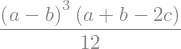

In [1]:
import sympy as sp
sp.init_printing()
a, b, c, t, alpha1, alpha2, alpha3 = sp.symbols(
    'a b c t \\alpha_1 \\alpha_2 \\alpha_3', real=True)
sp.integrate((t-a)*(t-b)*(t-c), (t, a, b)).factor()

Donc si $c\ne\frac{a+b}2$, $\alpha_4=0$. Que se passe-t-il si $c=\frac{a+b}2$ ?

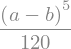

In [2]:
sp.integrate(((t-a)*(t-b)*(t-c)**2).subs({c: (a+b)/2}), (t, a, b)).factor()

On trouve encore $\alpha_4=0$. une fois que $\alpha_4=0$ est connu, en appliquant successivement aux fonctions $x\longmapsto (x-a)\,(x-b)$, $x\longmapsto(x-a)\,(x-c)$ et $x\longmapsto (x-b)\,(x-c)$ on trouve que $\alpha_1=\alpha_2=\alpha_3=0$.

**Question 2** Le deuxième calcul ci-dessus n'est plus possible. Si on suppose que $c=\frac{a+b}2$, les formes linéaires sont liées. En effet

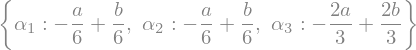

In [3]:
def psi(f):
    return alpha1*f(a)+alpha2*f(b)+alpha3*f((a+b)/2)-sp.integrate(f(t), (t, a, b))


sp.solve([psi(lambda t: 1), psi(lambda t: t), psi(lambda t: t**2),
          psi(lambda t: t**3)], [alpha1, alpha2, alpha3])

**Question 3** On aura donc
$$I_f=\frac{b-a}6\,\left(f(a)+2\,f\left(\frac{a+b}2\right)+f(b)\right)$$

## Exercice : interpolation

Soit $a_1<a_2<\cdots<a_n$, $n$ réels, où $n\in\mathbb{N}^*\setminus\{1\}$. Soit $(y_1,\ldots,y_{n},z_1,\ldots,z_n)\in\mathbb{R}^{2\,n}$.
1. Montrer l'existence et l'unicité d'une fonction polynomiale $P$ de degré $\le 2\,n-1$ qui vérifie
$$\forall i\in\{1,\ldots,n\},\; P(a_i)=y_i\quad\text{ et }\quad P'(a_{n+i})=z_i$$
1. Calculer $P$.

<div class="alert alert-danger">

On suit la démarche présentée en cours pour les fonctions polynomiales d'interpolation de Lagrange.
</div>

**Question 1** Considérons les formes linéaires définies sur $E=\mathrm{Vect}\left(\left\{x\longmapsto x^k,\; k\in\{0,\ldots,\color{red}{2\,n-1}\}\right\}\right)$ par
1. Pour $i\in\{1,\ldots,n\}$, $\varphi_i\;:\;P\longmapsto P(a_i)$
1. Pour $i\in\{n+1,\ldots,\color{red}{2\,n}\}$, $\varphi_i\;:\;P\longmapsto P'(a_{\color{red}{i-n}})$
- *Ces formes linéaires sont indépendantes.* Soit $(\alpha_1,\ldots,\alpha_{\color{red}{2\,n}})\in\mathbb{R}^{\color{red}{2\,n}}$ tels que
$$\sum_{k=1}^{\color{red}{2\,n}} \alpha_k.\varphi_k=0_{_{E^\star}}$$
Pour $j\in\{1,\ldots,n\}$, on considère la fonction polynomiale définie par
$$P_j\;:\;x\longmapsto (x-a_1)^2\cdots(x-a_{j-1})^2\,(x-a_j)\,(x-a_{j+1})^2\cdots(x-a_n)^2$$
et on calcule
$$0=\left(\sum_{k=1}^{\color{red}{2\,n}} \alpha_k.\varphi_k\right)(P_j)=\alpha_{n+j}\, \prod_{k\ne j} (a_j-a_k)^2$$
donc $\alpha_{n+j}=0$ (pour tout $j\in\{1,\ldots,n\}$). On a donc
$$\sum_{k=1}^n \alpha_k.\varphi_k=0_{_{E^\star}}$$
En considérant ensuite la fonction polynomiale définie par 
$$Q_j\;:\; x\longmapsto \prod_{k\ne j}(x-a_k)$$
on obtient
$$0=\left(\sum_{k=1}^n \alpha_k.\varphi_k\right)(Q_j)=\alpha_j\,Q_j(a_j)$$
donc $\alpha_j=0$, pour tout $j\in\{1,\ldots,n\}$. La famille est bien libre.
- *Ces $\color{red}{2\,n}$ formes linéaires forment une base de $E^\star$.* Car elles forment une partie libre de cardinal $\color{red}{2\,n}$ dans $E^\star$ qui est de dimension $\color{red}{2\,n}$.
- En considérant la base ante-duale de $(\varphi_1,\ldots,\varphi_{\color{red}{2\,n}})$, que nous noterons $(R_1,\ldots,R_{\color{red}{2\,n}})$, la fonction $P$ cherchée s'écrit comme combinaison linéaire de cette base, il existe donc $(\beta_1,\ldots,\beta_{\color{red}{2\,n}})\in\mathbb{R}^{\color{red}{2\,n}}$ tels que
$$P=\sum_{k=1}^{\color{red}{2\,n}} \beta_k.R_k$$
En appliquant pour $j\in\{1,\ldots,\color{red}{2\,n}\}$, la forme linéaire $\color{red}{\varphi_j}$ sur $P$, on obtient
$$\forall j\in\{1,\ldots,n\},\; \beta_j=\begin{cases} y_j&\text{si } j\le n\\ z_{j-n}&\text{si } j>n\end{cases}$$
Ce qui montre l'existence et l'unicité de $P$ qui vaut
$$\boxed{P=\sum_{k=1}^n \left(y_k.R_k+z_k.R_{n+k}\right)}$$

**Question 2** Il faut trouver les $R_k$ pour avoir la formule de $P$. Essayons de deviner leurs formes avec $n=3$.

*Calcul de $R_1$* Il vérifie les équations
$$R_1(a_1)=1,\quad R_1(a_2)=R_1(a_3)=R'_1(a_1)=R'_1(a_2)=R'_1(a_3)=0$$
Il s'écrit sous la forme
$$R_1\;:\;x\longmapsto (\alpha_1\,t+\alpha_2)\,(x-a_2)^2\,(x-a_3)^2$$

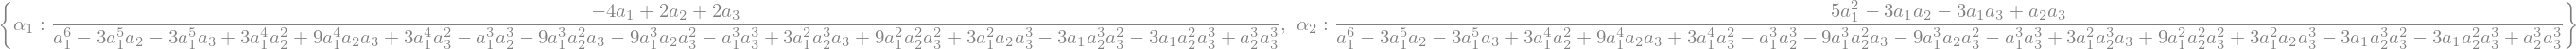

In [4]:
a1, a2, a3 = sp.symbols('a_1 a_2 a_3', real=True)
def R1(t): return (alpha1*t+alpha2)*(t-a2)**2*(t-a3)**2


sp.solve([R1(a1)-1, R1(t).diff(t).subs({t: a1})], [alpha1, alpha2])

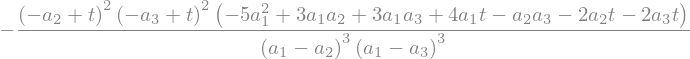

In [5]:
R1(t).subs(_).factor()

Le calcul ne semble pas se faire facilement...

$\blacktriangleright$ Comme le calcul brut ne donne rien, on va essayer de raisonner simplement. Introduisons la fonction polynomiale d'interpolation de Lagrange vue en cours, en posant pour $i\in\{1,\ldots,n\}$
$$L_i\;:\; x\longmapsto \prod_{k=1,\,k\ne j}^n \frac{x-a_k}{a_j-a_k}$$ 
alors $L_i$ est de degré $\le n-1$ et $L_1^2$ de degré $\le 2\,n-2$. Cherchons, pour $j\in\{1,\ldots,n\}$, $R_j$ sous la forme
$$t\longmapsto (\alpha\,t+\beta)\,L_j^2(t)$$
on doit avoir alors
$$\alpha\,a_j+\beta=1\quad\text{et}\quad \alpha+2\,(\alpha\,a_j+\beta)\,L_j'(a_j)=\alpha+2\,L_j'(a_j)=0$$
Ce qui se résout facilement.

<div class="alert alert-danger">
    
On remarque que le calcul était compliqué car il faisait intervenir la dérivée de la fonction polynomiale d'interpolation de Lagrange.

$\blacktriangleright$ On cherche sous la même forme $R_{n+j}$, on obtient alors
$$\alpha\,a_j+\beta=0\quad\text{et}\quad \alpha=1$$

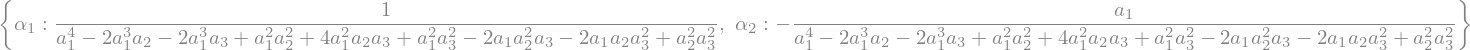

In [6]:
# Vérification en Python
def R4(t):
    return (alpha1*t+alpha2)*(t-a2)**2*(t-a3)**2


sp.solve([R4(a1), R4(t).diff(t).subs({t: a1})-1], [alpha1, alpha2])

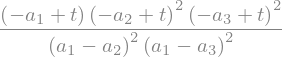

In [7]:
R4(t).subs(_).factor()

## Complément

Pour ceux qui ont fini, on reprend l'exercice 1, mais on se place dans $E'=\mathscr{C}^\infty\left([a,b],\mathbb{R}\right)$. Soit $f\in E'$, donner un majorant de (évaluation de l'erreur de la méthode approchée).
$$\left|\int_a^b f(t)\;\mathrm{d}t-I_f\right|$$